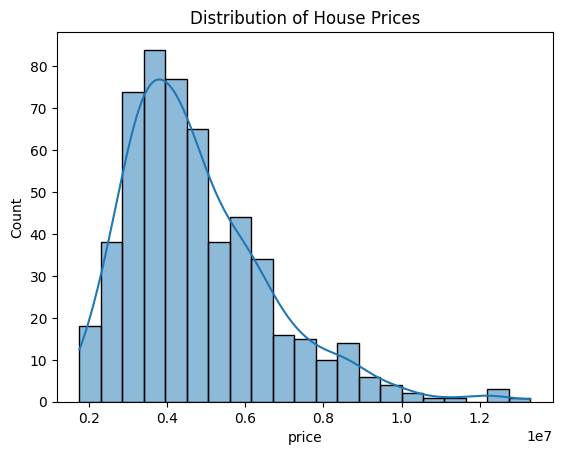


Model Evaluation (Original Price Scale):
MAE:  960123.17
MSE:  1728299877704.57
RMSE: 1314648.20
R²:   0.66


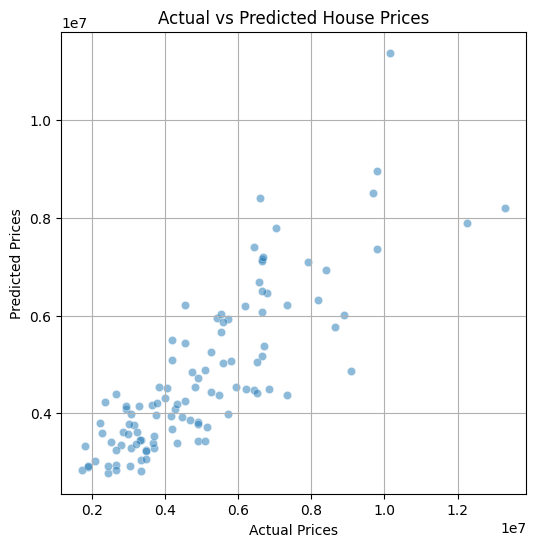

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

data = pd.read_csv('house_price_data.csv')

# data['date'] = pd.to_datetime(data['date'], errors='coerce')
# data.drop(columns=[col for col in ['id', 'date'] if col in data.columns], inplace=True)

data = data.dropna(subset=['price']) 
data.fillna(data.median(numeric_only=True), inplace=True)

# plt.figure(figsize=(4, 4))
# sns.lineplot(x='condition', y='price', data=data, marker='o', color='green')
# plt.title('Line: Condition vs Price')
# plt.xlabel('Condition')
# plt.ylabel('Price')
# plt.grid(True)
# plt.show()

sns.histplot(data['price'], kde=True)
plt.title("Distribution of House Prices")
plt.show()

data_encoded = pd.get_dummies(data, drop_first=True)

y = np.log1p(data_encoded["price"])
X = data_encoded.drop("price", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

y_test_original = np.expm1(y_test)
y_pred_original = np.expm1(y_pred)

# Evaluation metrics
mae = mean_absolute_error(y_test_original, y_pred_original)
mse = mean_squared_error(y_test_original, y_pred_original)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_original, y_pred_original)

print("\nModel Evaluation (Original Price Scale):")
print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.2f}")

# Plot: Actual vs Predicted
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test_original, y=y_pred_original, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()


In [3]:
import pickle 

In [4]:
with open('model_pickle','wb') as f:
    pickle.dump(model,f)